# Car Price Predictor
------------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mplt
%matplotlib inline
mplt.style.use('ggplot')

In [2]:
data=pd.read_csv('C:/Users/hp/Desktop/car/car.csv')

In [3]:
data.shape

(892, 6)

In [4]:
data.columns

Index(['name', 'company', 'year', 'Price', 'kms_driven', 'fuel_type'], dtype='object')

In [5]:
data.head(20)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
5,Ford EcoSport Titanium 1.5L TDCi,Ford,2015,Ask For Price,"59,000 kms",Diesel
6,Ford Figo,Ford,2012,"1,75,000","41,000 kms",Diesel
7,Hyundai Eon,Hyundai,2013,"1,90,000","25,000 kms",Petrol
8,Ford EcoSport Ambiente 1.5L TDCi,Ford,2016,"8,30,000","24,530 kms",Diesel
9,Maruti Suzuki Alto K10 VXi AMT,Maruti,2015,"2,50,000","60,000 kms",Petrol


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


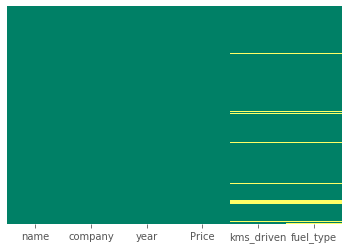

In [7]:
sns.heatmap(data.isnull(), yticklabels = False, cbar = False ,cmap='summer')

**We can see null values are there so data cleaning is needed.**

In [8]:
#cleaning unwanrted values in the year column and bringing the type of year column to integer
data=data[data['year'].str.isnumeric()] #removed all the character values

data['year']=data['year'].astype(int)

In [9]:
#cleaning unwanrted values in the Price column and bringing the type of Price column to integer

data = data[data['Price']!='Ask for Price']
data = data[data['Price']!='Ask For Price']

In [10]:
data['Price']=data['Price'].str.replace(',','')

In [11]:
data['Price'] = data['Price'].astype(int)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 819 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        819 non-null    object
 1   company     819 non-null    object
 2   year        819 non-null    int32 
 3   Price       819 non-null    int32 
 4   kms_driven  819 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int32(2), object(4)
memory usage: 38.4+ KB


In [13]:
data = data.dropna() #for fuel_type column

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int32(2), object(4)
memory usage: 38.2+ KB


In [15]:
data['fuel_type'].unique()

array(['Petrol', 'Diesel', 'LPG'], dtype=object)

In [16]:
#removing the unwanted charaters in kms driven

data['kms_driven']=data['kms_driven'].str.replace(',','')
data['kms_driven']=data['kms_driven'].str.replace('kms','')

In [17]:
data['kms_driven'] = data['kms_driven'].astype(int)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.1+ KB


In [19]:
data['name']=data['name'].str.split().str.slice(start=0,stop=3).str.join(' ')  #for keeping the first 3 words of the model name column

In [20]:
data

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
885,Tata Indica V2,Tata,2009,110000,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM,Tata,2018,260000,27000,Diesel


**data is cleaned now**

In [21]:
data.to_csv('cleaned.csv')

In [22]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
name,816,254,Maruti Suzuki Swift,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN
company,816,25,Maruti,221,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,816,NaN,NaN,NaN,2012.44,4.00299,1995,2010,2013,2015,2019
Price,816,NaN,NaN,NaN,411718,475184,30000,175000,299999,491250,8.5e+06
kms_driven,816,NaN,NaN,NaN,46275.5,34297.4,0,27000,41000,56818.5,400000
fuel_type,816,3,Petrol,428,NaN,NaN,NaN,NaN,NaN,NaN,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A2846F0C48>,
      dtype=object)

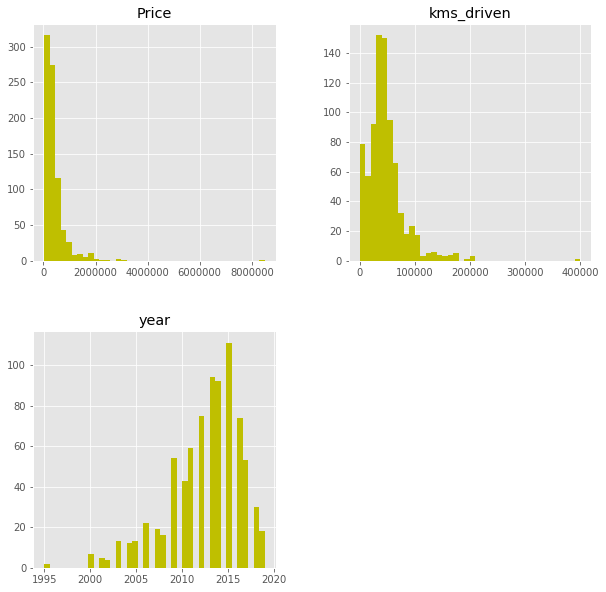

In [23]:
data.hist(figsize = (10,10),color="y",bins=40,alpha=1)

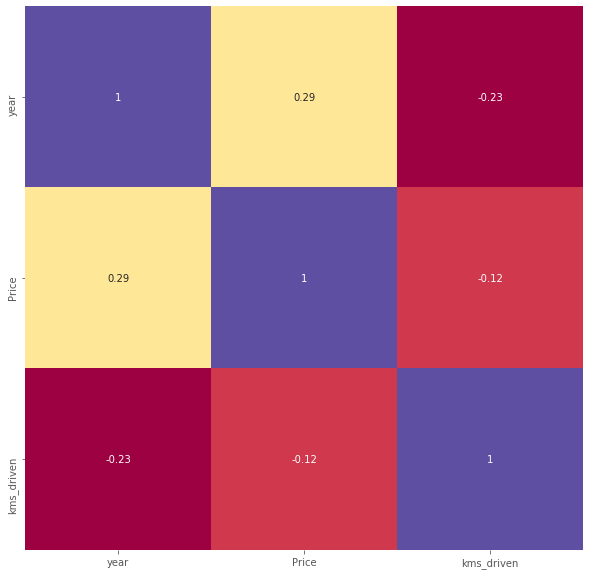

In [24]:
c = data.corr()
top_corr_features = c.index
plt.figure(figsize=(10,10))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap='Spectral',cbar=False)

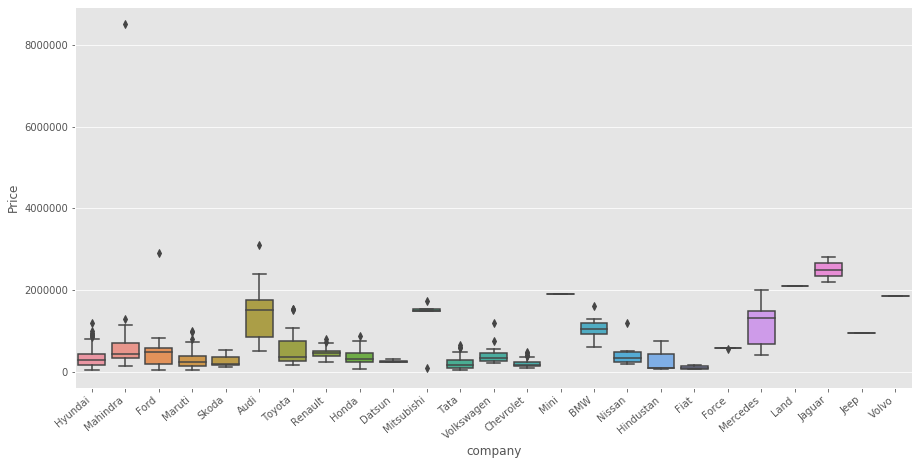

In [25]:
# relationship between company and price

plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='Price',data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

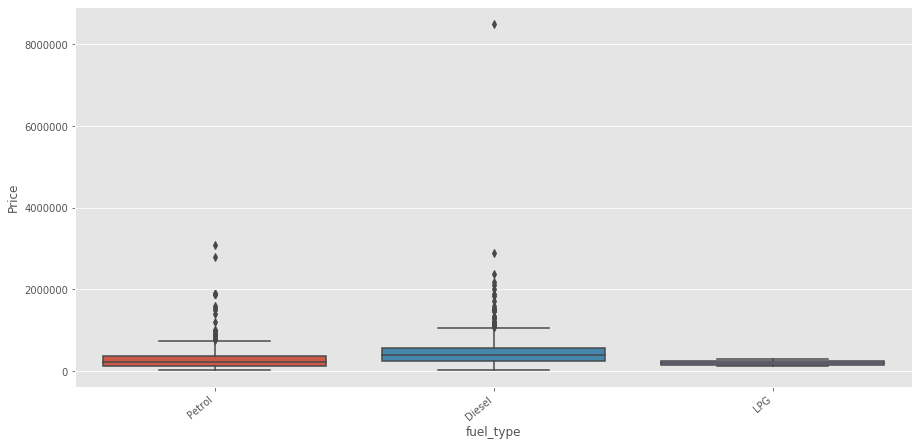

In [26]:
# relationship between fuel_type and price

plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='fuel_type',y='Price',data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

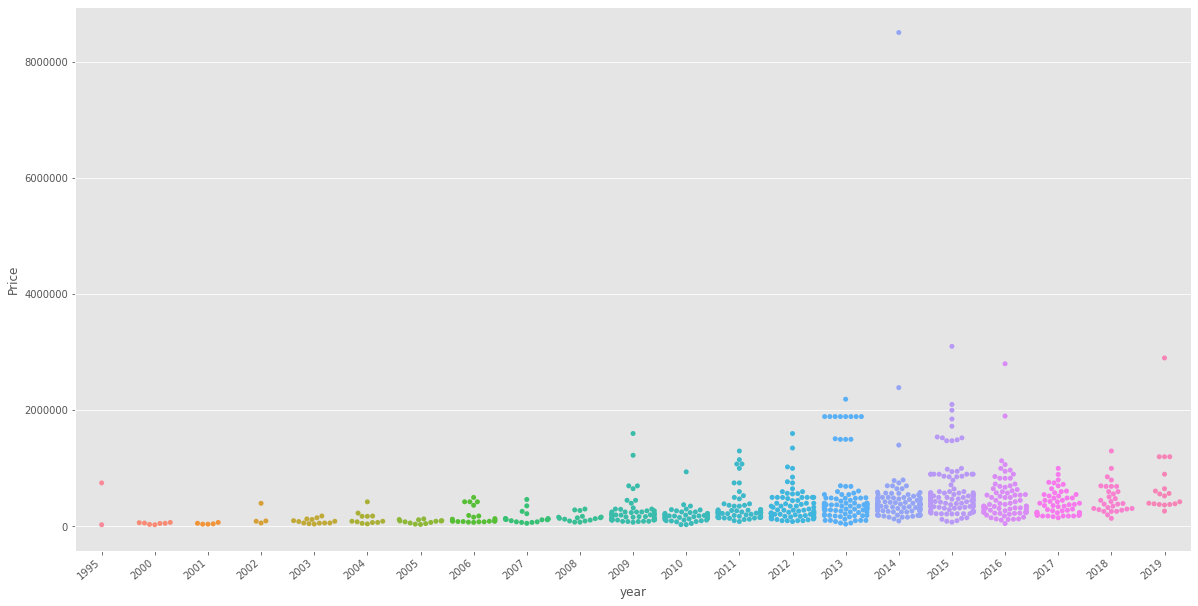

In [27]:
#relationship between price and year

plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='year',y='Price',data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

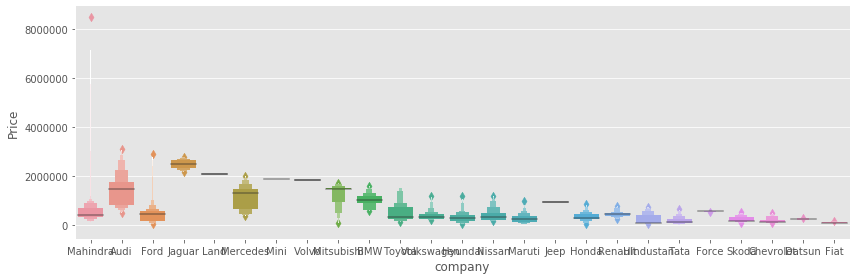

In [28]:
sns.catplot(y = "Price", x = "company", data = data.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [29]:
data=data[['name','company','year','kms_driven','fuel_type','Price']]

In [30]:
data.head()

,name,company,year,kms_driven,fuel_type,Price
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol,80000
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel,425000
3,Hyundai Grand i10,Hyundai,2014,28000,Petrol,325000
4,Ford EcoSport Titanium,Ford,2014,36000,Diesel,575000
6,Ford Figo,Ford,2012,41000,Diesel,175000


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import r2_score

In [33]:
fd,cd,nd = {},{},{}
le = LabelEncoder()
data['fuel_type'] = le.fit_transform(data['fuel_type'])
fuel = le.inverse_transform(data['fuel_type'])
for i in range(len(fuel)):
    fd[fuel[i]] = data['fuel_type'].values[i]
data['company'] = le.fit_transform(data['company'])
company = le.inverse_transform(data['company'])
for i in range(len(company)):
    cd[company[i]] = data['company'].values[i]
data['name'] = le.fit_transform(data['name'])
name = le.inverse_transform(data['name'])
for i in range(len(company)):
    nd[name[i]] = data['name'].values[i]
data_orig = data
data_orig

,name,company,year,kms_driven,fuel_type,Price
0,91,9,2007,45000,2,80000
1,118,13,2006,40,0,425000
3,88,9,2014,28000,2,325000
4,40,6,2014,36000,0,575000
6,45,6,2012,41000,0,175000
...,...,...,...,...,...,...
883,159,14,2011,50000,2,270000
885,203,21,2009,30000,0,110000
886,231,22,2009,132000,2,300000
888,229,21,2018,27000,0,260000


In [34]:
encoderr = pd.get_dummies(data,columns=['name','company','fuel_type'],drop_first=True)
encoderr.head(12)

,year,kms_driven,Price,name_1,name_2,name_3,name_4,name_5,name_6,name_7,...,company_17,company_18,company_19,company_20,company_21,company_22,company_23,company_24,fuel_type_1,fuel_type_2
0,2007,45000,80000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2006,40,425000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2014,28000,325000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2014,36000,575000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2012,41000,175000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2013,25000,190000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,2016,24530,830000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2015,60000,250000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10,2010,60000,182000,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
11,2015,30000,315000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [35]:
import pickle as pkl
# Getting the values for the form.
pkl.dump(fd,open('fuel.pkl','wb'))
pkl.dump(cd,open('company.pkl','wb'))
pkl.dump(nd,open('name.pkl','wb'))

In [36]:
Y = np.array(data.iloc[:,2].values)
X = np.array(data.drop(columns=['Price'],axis=1).iloc[:,:].values)

In [37]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, Y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [38]:
print(selection.feature_importances_)

[1.91431255e-06 9.83318549e-06 9.97023265e-01 6.80567742e-04
 2.28442021e-03]


In [39]:
# Train test split
trainx,testx,trainy,testy = train_test_split(X,Y,test_size = 0.2, random_state = 12)

In [40]:
scaler = StandardScaler()
trainx = scaler.fit_transform(trainx)
testx = scaler.fit_transform(testx)

# Linear Regression
lr = LinearRegression()
lr.fit(trainx, trainy)
y_pred1 = lr.predict(testx)
r2_score(testy,y_pred1)

0.9958165711114529

In [41]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(testy, y_pred1))
print('MSE:', metrics.mean_squared_error(testy, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(testy, y_pred1)))

MAE: 0.20883907334337537
MSE: 0.07155442787669739
RMSE: 0.2674965941403692


In [42]:
pkl.dump(lr,open('linreg1.pkl','wb'))
pkl.dump(data['year'],open('year.pkl','wb'))

In [43]:
fuel = pkl.load(open('fuel.pkl', 'rb'))

company = pkl.load(open('company.pkl', 'rb'))

name = pkl.load(open('name.pkl','rb'))

year = pkl.load(open('year.pkl', 'rb'))

# Regressor
reg = pkl.load(open('linreg1.pkl', 'rb'))

import math

In [44]:
brand = "Ford"
yop = 2012
dist = 41000
ful = "Diesel"
name_ = "Ford Figo"
# Encoding brand, name and fuel
brand_enc = company[brand]
n = name[name_]
fuel_enc = fuel[ful]
inputt = [n,brand_enc, yop, dist,fuel_enc]
# Prediction results
price = (math.ceil(reg.predict(np.array(inputt).reshape(1, 5))))
price*20

199800